## Importing Required Libraries

In [675]:
# Data Manipulation Libraries
import pandas as pd
import warnings
import numpy as np

#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data-Preprocessing and Creating Pipeline Related Libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import SplineTransformer
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

#Machine Learning Model (Regression, CLassifier and Ensemple Technique) Building Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 


#Performance Evaluation Metrics Related Libraries
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score, recall_score, f1_score, roc_curve,auc

#Ignore Warnings issued by any Cell.
warnings.filterwarnings('ignore')

**Loading the DataSet**


In [676]:
dataset = pd.read_csv('creditcard.csv')

In [677]:
print("Shape : ",df.shape)

Shape :  (2, 2)


In [678]:
dataset.shape

(284807, 31)

**Exploratory Data Analysis (EDA)**

In [679]:
#Total Columns in the dataset
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [680]:
#Dataset Information
print("Dataset Info : ", dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [681]:
#Detaialed Dataset Info (Shows Statistics of the data)
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [682]:
# Identifying the count of each class labels.

vcounts = dataset['Class'].value_counts()
percent = round(vcounts*100/vcounts.sum(),1)
df = pd.DataFrame({'Value_counts' : vcounts, 'Percent':percent})
df.rename(index = {0:'Genuine Tranx', 1:'Fraud tranx'}, inplace = True)
print(df)

               Value_counts  Percent
Genuine Tranx        284315     99.8
Fraud tranx             492      0.2


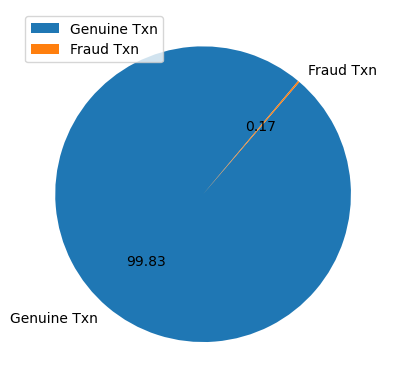

In [683]:
#Plotting the above counts using pie chart.
import matplotlib.pyplot as plt

plt.pie(dataset['Class'].value_counts(), labels=['Genuine Txn', 'Fraud Txn'], autopct = '%.2f', startangle=50)
plt.legend()
plt.show()

In [684]:
# separating the dataset based on class labels and assigning them to different variables.
genuine_txn = dataset[dataset.Class == 0]
fraud_txn = dataset[dataset.Class == 1]

<Figure size 640x480 with 0 Axes>

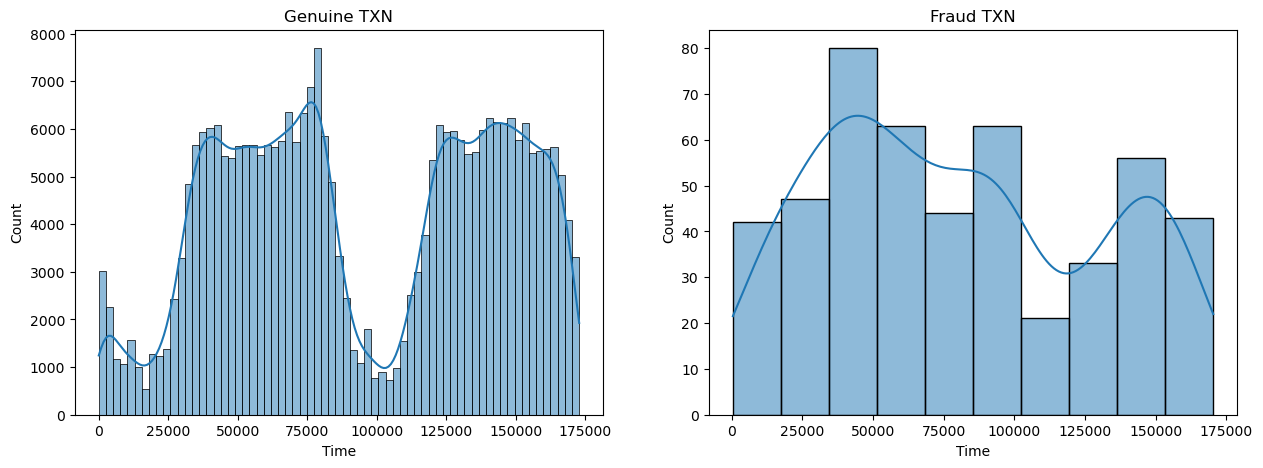

In [685]:
#Plotting the time feature on two different class labels.
import seaborn as sns
plt.suptitle("Distribution Of Time Feature across all the transactions",size = '20',weight = 'bold')


plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(genuine_txn.Time,kde = True)
plt.title('Genuine TXN')

plt.subplot(1,2,2)
sns.histplot(fraud_txn.Time,kde = True)
plt.title('Fraud TXN')

plt.show()

<Figure size 640x480 with 0 Axes>

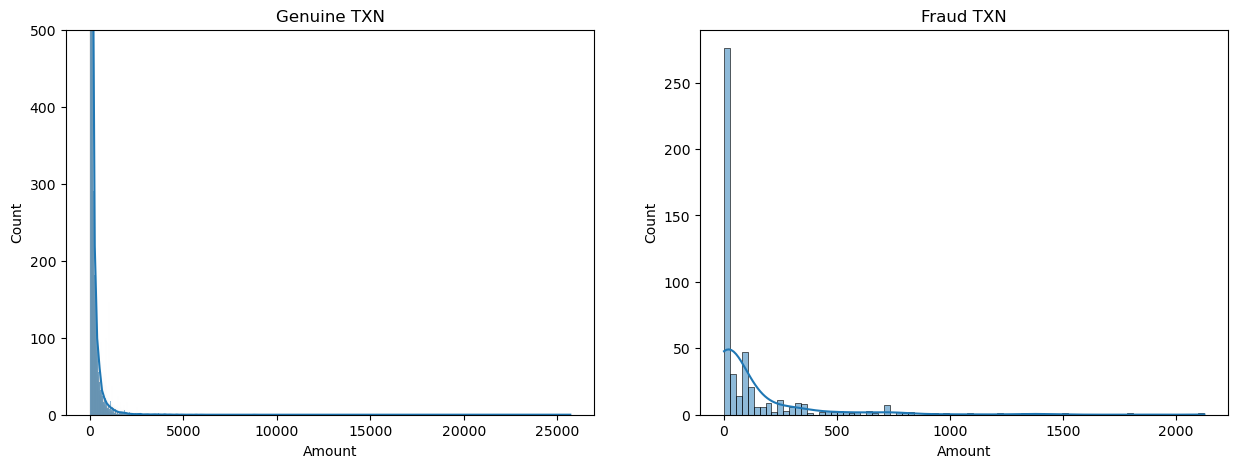

In [686]:
# Plotting the Transactional Amount feature on two different class labels.
plt.suptitle("Distribution of Amount across all the transactions",
             size = '15',weight = 'bold')

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.histplot(genuine_txn.Amount,kde = True)
plt.ylim(0,500)
plt.title('Genuine TXN')

plt.subplot(1,2,2)
sns.histplot(fraud_txn.Amount, kde = True)
plt.title('Fraud TXN')

plt.show()

The above Graph Visualization shows us that the fraud transaction are in the low amounts 



*   **Fraud TXN : 0 - 400**






In [687]:
# Data Information on how the transactions took place based on time.
print(dataset.groupby('Class')['Time'].describe())

          count          mean           std    min      25%      50%  \
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

            75%       max  
Class                      
0      139333.0  172792.0  
1      128483.0  170348.0  


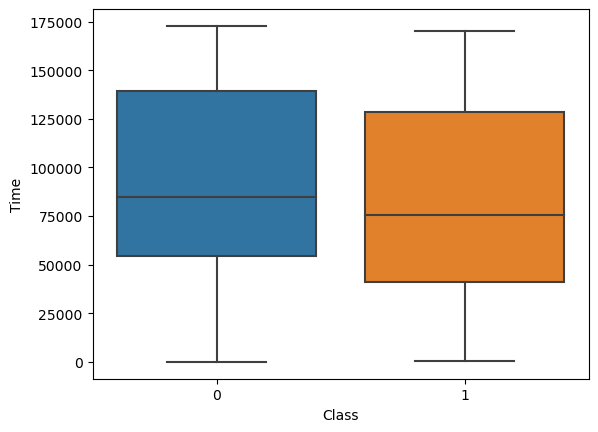

In [688]:
# Box plot to find if there is any difference across how the transactions took place based on Time. 
sns.boxplot(y = dataset.Time,x = dataset.Class)
plt.show()

In [689]:
# Data Information on how the transactions took place based on amount.
print(dataset.groupby('Class')['Amount'].describe())

          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


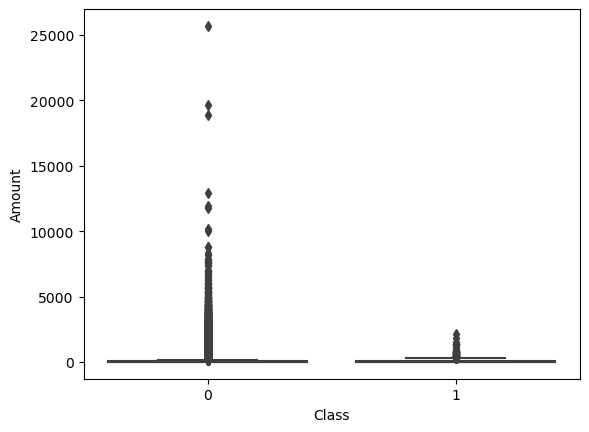

In [690]:
# Box plot to find if there is any difference across how the transactions took place based on amount. 
sns.boxplot(y = dataset.Amount,x = dataset.Class)
plt.show()

In [691]:
#Removing Outliers
def outliers(arr):
    percent25,percent75 = np.percentile(arr,[25,75])
    mean = np.mean(arr)
    iqr = percent75 - percent25

    upper_fence = mean + 1.5*iqr
    lower_fence = mean - 1.5*iqr

    outliers_count = ((arr > upper_fence) | (arr < lower_fence)).sum()

    return upper_fence,lower_fence,outliers_count

In [692]:
#Outliers in both Genuine Txn and Fraud Txn
print("Number of outliers in Genuine amount transactions: ",outliers(genuine_txn.Amount)[2])
print("Number of outliers in fraud amount transactions: ",outliers(fraud_txn.Amount)[2])

Number of outliers in Genuine amount transactions:  30081
Number of outliers in fraud amount transactions:  66


In [693]:
#Using outlier function to get the range for outlier detection

genuine_amnt_outliers = outliers(genuine_txn.Amount)
fraud_amnt_outliers = outliers(fraud_txn.Amount)

l_out = genuine_txn[genuine_txn.Amount <= genuine_amnt_outliers[0]]
f_out = fraud_txn[fraud_txn.Amount <= fraud_amnt_outliers[0]]

print("Genuine:\n Upper Fence:{} Lower Fence:{} Outliers Count:{}\n\n".format(genuine_amnt_outliers[0],genuine_amnt_outliers[1],genuine_amnt_outliers[2]))
print("Fraud:\n Upper Fence:{} Lower Fence:{} Outliers Count:{}\n\n".format(fraud_amnt_outliers[0],fraud_amnt_outliers[1],fraud_amnt_outliers[2]))


Genuine:
 Upper Fence:195.39102242231326 Lower Fence:-18.80897757768672 Outliers Count:30081


Fraud:
 Upper Fence:279.5463211382114 Lower Fence:-35.12367886178862 Outliers Count:66




In [694]:
# concatenating the dataframe of both genuine & fraud datasets after outliers removal
df_aft_outliers = pd.concat([l_out,f_out])
df_aft_outliers.shape

(254660, 31)

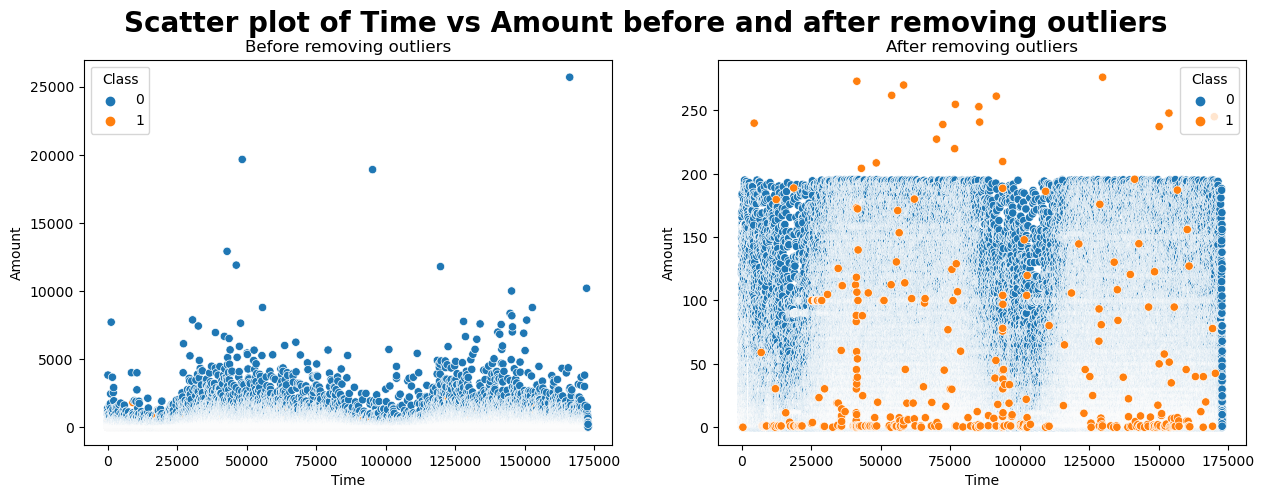

In [695]:
# Scatter plot for time vs amount for removal of outliers.
plt.figure(figsize=(15,5)) # adding fig size
plt.suptitle("Scatter plot of Time vs Amount before and after removing outliers\n\n",size = 20,weight = 'bold')

plt.subplot(1,2,1)
sns.scatterplot(dataset,y = dataset.Amount,x = dataset.Time,hue = dataset.Class)
plt.title('Before removing outliers')

plt.subplot(1,2,2)
sns.scatterplot(df_aft_outliers,y = df_aft_outliers.Amount,x = df_aft_outliers.Time,hue = df_aft_outliers.Class)
plt.title("After removing outliers")

plt.show()

<Figure size 640x480 with 0 Axes>

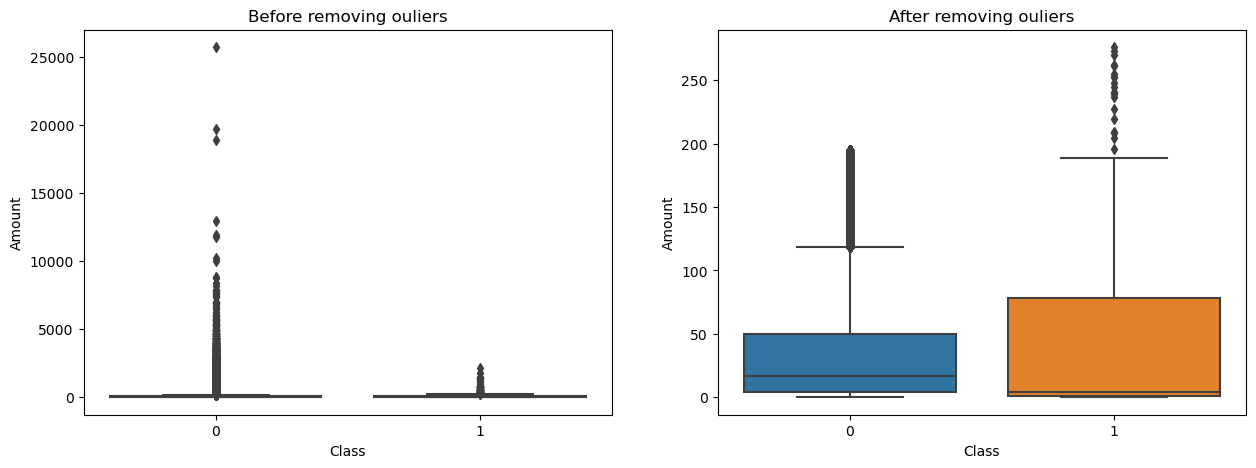

In [696]:
# Box plot of after removal of outliers
plt.suptitle("Box plot of transactional Amount before and after removing outliers ",size = 20,weight = 'bold')

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(y = dataset.Amount,x = dataset.Class)
plt.title('Before removing ouliers')

plt.subplot(1,2,2)
sns.boxplot(y = df_aft_outliers.Amount,x = df_aft_outliers.Class)
plt.title('After removing ouliers')

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

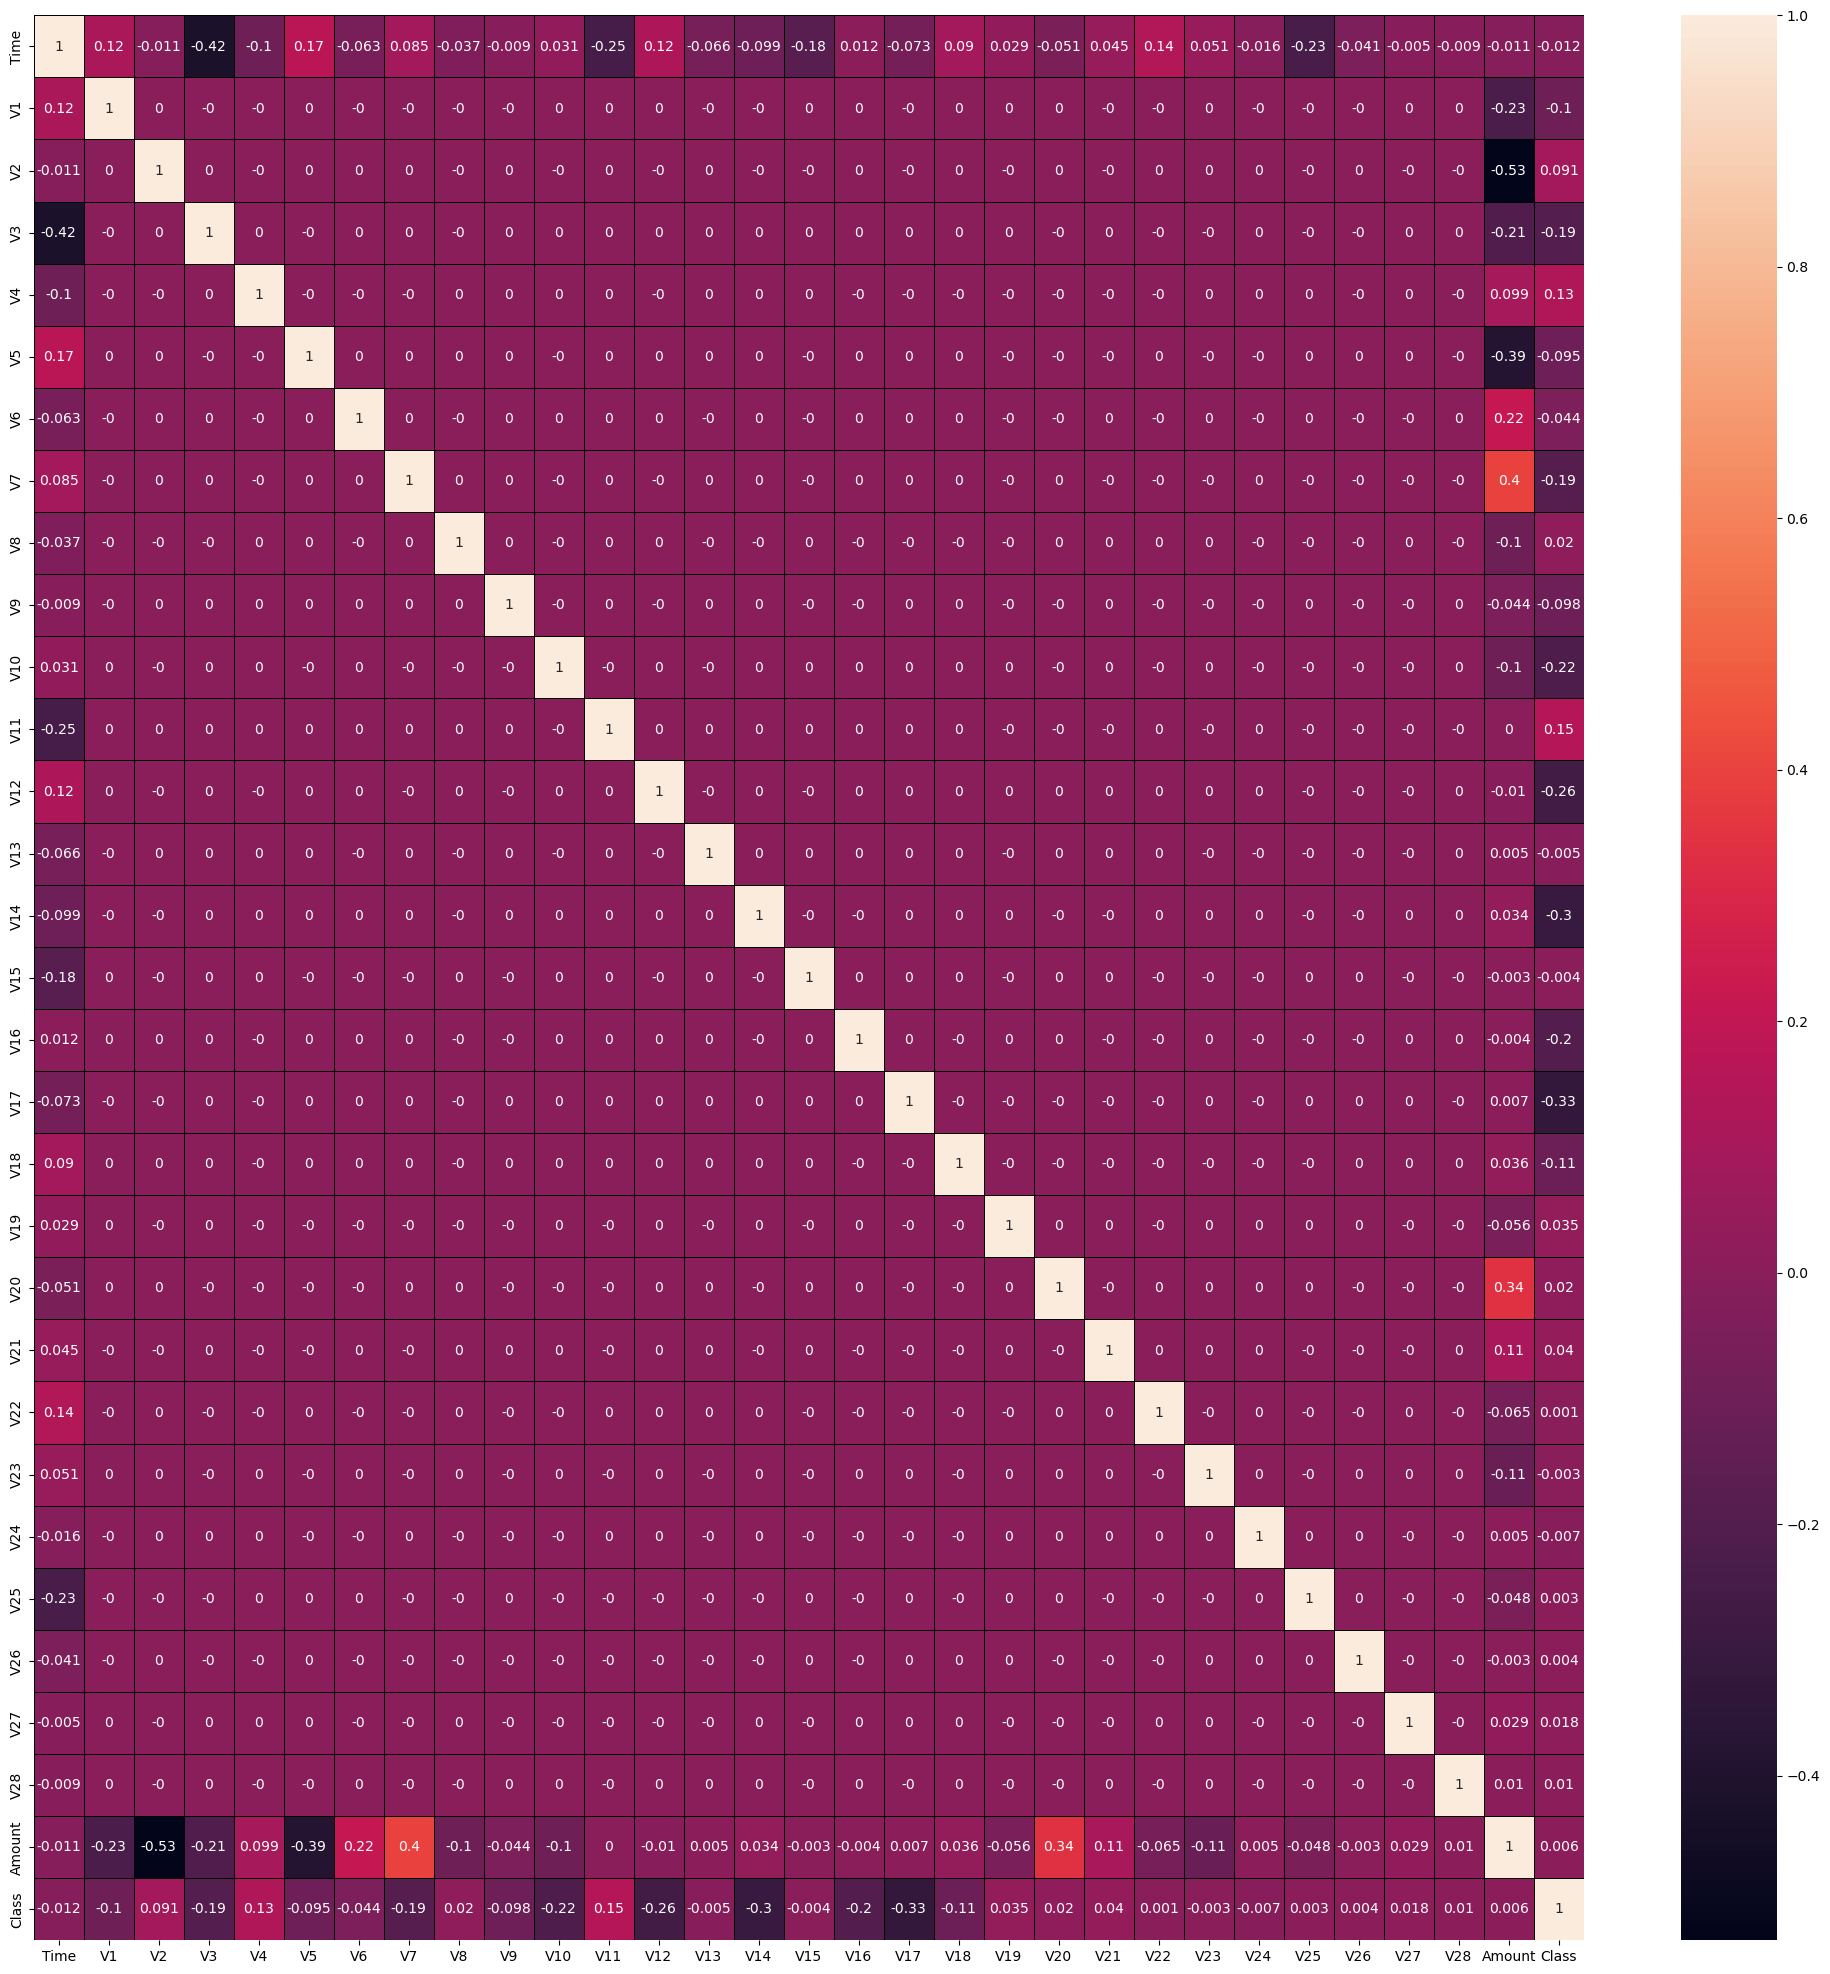

In [697]:
# Data Correlation using Heatmap
plt.figure(figsize=(25,25))
sns.heatmap(round(dataset.corr(),3), annot = True, cmap=sns.color_palette("rocket", as_cmap=True), linewidths = 0.5, linecolor='black')

plt.show

In [698]:
#Finding Null- Values
dataset.isna().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Data Processing**

In [699]:
# Fetch the columns from the DataFrame
columns = dataset.columns.tolist()

print("shape of data",dataset.shape)
print()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]  


# Store the variable used while predicting 
target = "Class"

X = dataset[columns]  # all the columns data there except class
Y = dataset[target]   # only Class columns data there

# Print shapes
print("X shape : ",X.shape)
print("Y shape : ",Y.shape)

shape of data (284807, 31)

X shape :  (284807, 30)
Y shape :  (284807,)


In [700]:
# Splitting of data into 80-20 ratio. 
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#Printing the shape of all the splits.
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(227845, 30)
(56962, 30)
(227845,)
(56962,)


In [701]:
X_train.shape

(227845, 30)

In [702]:
X_test.shape

(56962, 30)

In [703]:
Y_train.shape

(227845,)

In [704]:
Y_test.shape

(56962,)

In [705]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
13367,23610.0,1.387525,-0.547811,0.076422,-0.739334,-0.519887,-0.026007,-0.694673,-0.052100,0.378187,...,-0.469630,-0.658299,-1.307286,-0.013221,-0.912415,0.163178,0.920997,-0.096560,-0.014846,31.35
31788,36516.0,1.021179,-0.194114,1.207791,1.738369,-0.659824,0.631864,-0.434168,0.227422,1.116400,...,-0.090960,-0.386993,-0.664598,0.047173,0.106897,0.443932,-0.515898,0.091188,0.035959,41.29
84796,60465.0,-1.134453,0.636843,2.457241,1.317848,0.605755,0.143546,0.242076,0.371466,-1.315582,...,-0.040412,0.328508,0.683118,-0.114294,0.203942,0.035426,-0.090987,0.057247,0.102961,23.27
6243,7309.0,-0.851343,0.062000,1.406917,-1.669375,0.462639,-0.150804,0.403887,0.200460,1.968672,...,-0.301203,-0.400262,-1.096108,0.023423,-0.842077,-0.301144,0.932506,-0.088128,0.076487,45.00
162432,115111.0,-0.040314,0.545458,0.831788,-0.515723,0.128584,-0.112466,0.027800,0.222503,0.639397,...,-0.120943,0.102439,0.351638,0.180840,0.572238,-1.486248,0.147366,0.253324,0.291266,9.84


In [706]:
Y_train.head()

13367     0
31788     0
84796     0
6243      0
162432    0
Name: Class, dtype: int64

In [707]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76


In [708]:
Y_test.head()

169876    0
127467    0
137900    0
21513     0
134700    0
Name: Class, dtype: int64

**Feature Scaling **



*   *Converting different units and magnitudes data into one unit.*



In [709]:
ss=StandardScaler()
X_train_ss = ss.fit_transform(X_train)  # convert all data into float data type
X_test_ss=ss.transform(X_test)       
X_test_ss.dtype

dtype('float64')

**Machine Learning Model Building**



*   *Now we have clean data to build ML Models. We will train and compare different individual ML algorithms and then train using the sklearn.Pipeline (Ensemble Learning).* 



In [710]:
# Logistic Regression
lr_clf = LogisticRegression(random_state=1,penalty="l2")
lr_clf.fit(X_train,Y_train)

y_pred_lr = lr_clf.predict(X_test)

acc_lr = accuracy_score(Y_test,y_pred_lr)
print("Accuracy for LR",acc_lr)

## trained with Standard Scalar data

lr_clf_ss = LogisticRegression(random_state=1,penalty="l2")
lr_clf_ss.fit(X_train_ss, Y_train)

y_pred_lr_ss = lr_clf_ss.predict(X_test_ss)

acc_lr_ss = accuracy_score(Y_test,y_pred_lr_ss)
print("Accuracy for LR with Standard Scalar",acc_lr_ss)

Accuracy for LR 0.9989291106351603
Accuracy for LR with Standard Scalar 0.9991397773954567


In [711]:
# Decision tree Classifier
dt_clf = DecisionTreeClassifier(criterion="entropy",random_state=5)
dt_clf.fit(X_train,Y_train)
y_pred_dt = dt_clf.predict(X_test)
acc_dt = accuracy_score(Y_test,y_pred_dt)
print("Accuracy for DT :" ,acc_dt)

# train with Standard Scalar
dt_clf_ss = DecisionTreeClassifier(criterion="entropy",random_state=5)
dt_clf_ss.fit(X_train_ss,Y_train)
y_pred_dt_ss = dt_clf_ss.predict(X_test_ss)
acc_dt_ss = accuracy_score(Y_test,y_pred_dt_ss)
print("Accuracy for DT with Standard Scalar",acc_dt_ss)

Accuracy for DT : 0.9991573329588147
Accuracy for DT with Standard Scalar 0.9991573329588147


In [712]:
# Random forest classifier
rf_clf = RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=5)
rf_clf.fit(X_train,Y_train)
y_pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(Y_test,y_pred_rf)
print("Accuracy for RF :" ,acc_rf)

# train with standard Scalar
rf_clf_ss = RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=5)
rf_clf_ss.fit(X_train_ss,Y_train)
y_pred_rf_ss = rf_clf_ss.predict(X_test_ss)
acc_rf_ss = accuracy_score(Y_test,y_pred_rf_ss)
print("Accuracy for RF with Standard Scalar :" ,acc_rf_ss)


Accuracy for RF : 0.9995611109160493
Accuracy for RF with Standard Scalar : 0.9995611109160493


In [713]:
# Adaboost classifier
ab_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",random_state=20),
                                                  n_estimators=200,
                                                   learning_rate=0.1,
                                                   algorithm="SAMME.R",
                                                   random_state=1, )

ab_clf.fit(X_train,Y_train)
y_pred_ab = ab_clf.predict(X_test)
acc_ab = accuracy_score(Y_test,y_pred_ab)
print("Accuracy for AdaBoost :", acc_ab)

# Train with Standard Scalar
ab_clf_ss = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",random_state=20),
                             n_estimators=200,
                             learning_rate=0.1,
                             algorithm="SAMME.R",
                             random_state=1,)
ab_clf_ss.fit(X_train_ss,Y_train)
y_pred_ab_ss = ab_clf_ss.predict(X_test_ss)
acc_ab_ss = accuracy_score(Y_test,y_pred_ab_ss)
print("Accuracy for AdaBoost with Standard Scalar: ",acc_ab_ss)

Accuracy for AdaBoost : 0.9992451107756047
Accuracy for AdaBoost with Standard Scalar:  0.9992451107756047


## Hyperparameter Tuning using XGBoost-Classifier with Pipeline

In [714]:
params={
 "n_estimators"     : [100,200,300,400,500,600,700,800,900,1000],
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [715]:
pipe = Pipeline([("Spline Transfrmer", SplineTransformer()),
                 ("PCA",PCA(n_components = None)),
                 ("classifier", XGBClassifier())])
pipe.fit(X_train,Y_train)

#HyperParameter Tuning
grid_param = [
                {"classifier" : [XGBClassifier()],
                 "classifier__n_estimators" : [100],
                 "classifier__min_child_weight": [7],
                 "classifier__max_depth": [10],
                 "classifier__learning_rate": [0.25],
                 "classifier__gamma": [0.1],
                 "classifier__colsample_bytree": [0.7]
                }
]

In [716]:
grid_search = GridSearchCV(pipe, grid_param, cv=5, verbose=0, n_jobs=-1)
best_model = grid_search.fit(X_train,Y_train)

In [717]:
best_model.best_params_

{'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.7, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.25, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=10, max_leaves=None,
               min_child_weight=7, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'classifier__colsample_bytree': 0.7,
 'classifier__gamma': 0.1,
 'classifier__learning_rate': 0.25,
 'classifier__max_depth': 10,
 'classifier__min_child_weight': 7,
 'classifier__n_estimators': 100}

In [718]:
print("The mean accuracy of the model is:",best_model.score(X_test,Y_test))

The mean accuracy of the model is: 0.9995786664794073


In [719]:
pred_fraud = best_model.predict(X_test)

## Evaluation Metrics for Classification Model

### Accuracy

In [720]:
#Logistic Regression
print(f"Accuracy for LR with Standard Scalar                         : {acc_lr_ss*100:0,.3f}%")

#Decision Tree
print(f"Accuracy for DT with Standard Scalar                         : {acc_dt_ss*100:0,.3f}%")

#Adaboost
print(f"Accuracy for AdaBoost with Standard Scalar                   : {acc_ab_ss*100:0,.3f}%")

#Random Forest
print(f"Accuracy for RF with Standard Scalar                         : {acc_rf_ss*100:0,.3f}%")

#Pipeline
acc_pipe = accuracy_score(Y_test,pred_fraud)
print('\033[1m' + f"Accuracy for Pipeline (SplineTransformer, PCA, XGBClassifier): {acc_pipe*100:0,.3f}%")

Accuracy for LR with Standard Scalar                         : 99.914%
Accuracy for DT with Standard Scalar                         : 99.916%
Accuracy for AdaBoost with Standard Scalar                   : 99.925%
Accuracy for RF with Standard Scalar                         : 99.956%
Accuracy for Pipeline (SplineTransformer, PCA, XGBClassifier): 99.958%


In [721]:
#Logistic Regression 
crossVal_lr = cross_val_score(lr_clf_ss,X_train,Y_train, cv=5)
# print(f"Cross Validation Score for LR :  {crossVal_lr*100:0,.3f}%")
#LR Cross-Validation Mean Percentage
crossVal_lr_mean = np.mean(crossVal_lr)
print(f"Credit Card Fraud Detection Classifier Cross-Validated using LR Accuracy       : {crossVal_lr_mean*100:.3f}%")


#Decision Tree
crossVal_dt = cross_val_score(dt_clf_ss,X_train,Y_train, cv=5)
# print(f"Cross Validation Score for DT :  {crossVal_dt*100:.3f}%")
#DT Cross-Validation Mean Percentage
crossVal_dt_mean = np.mean(crossVal_dt)
print(f"Credit Card Fraud Detection Classifier Cross-Validated using DT Accuracy       : {crossVal_dt_mean*100:.3f}%")


#AdaBoost Technique (Ensemble Method)
crossVal_ab = cross_val_score(ab_clf_ss,X_train,Y_train, cv=5)
# print(f"Cross Validation Score for AdaBoost :  {crossVal_ab*100:.3f}%")
#AdaBoost Cross-Validation Mean Percentage
crossVal_ab_mean = np.mean(crossVal_ab)
print(f"Credit Card Fraud Detection Classifier Cross-Validated using AdaBoost Accuracy : {crossVal_ab_mean*100:.3f}%")


#Random Forest
crossVal_rf = cross_val_score(rf_clf_ss,X_train,Y_train, cv=5)
# print(f"Cross Validation Score for DT :  {crossVal_rf*100:.3f}%")
#RF Cross-Validation Mean Percentage
crossVal_rf_mean = np.mean(crossVal_rf)
print(f"Credit Card Fraud Detection Classifier Cross-Validated using RF Accuracy       : {crossVal_rf_mean*100:.3f}%")

#Pipeline (Spline Transformer, PCA, XGBoost)
crossVal_pipe = cross_val_score(pipe,X_train,Y_train, cv=5)
# print(f"Cross Validation Score Pipeline(SplineTransformer,PCA,XGBClassifier)           :  {crossVal_pipe*100:.3f}%")
#DT Cross-Validation Mean Percentage
crossVal_pipe_mean = np.mean(crossVal_pipe)
print(f"Credit Card Fraud Detection Classifier Cross-Validated using pipeline, Accuracy: {crossVal_pipe_mean*100:.3f}%")

Credit Card Fraud Detection Classifier Cross-Validated using LR Accuracy       : 99.898%
Credit Card Fraud Detection Classifier Cross-Validated using DT Accuracy       : 99.919%
Credit Card Fraud Detection Classifier Cross-Validated using AdaBoost Accuracy : 99.920%
Credit Card Fraud Detection Classifier Cross-Validated using RF Accuracy       : 99.953%
Credit Card Fraud Detection Classifier Cross-Validated using pipeline, Accuracy: 99.954%


### Confusion Matrix

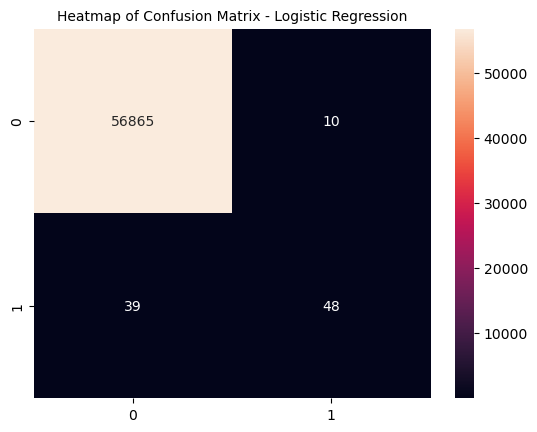

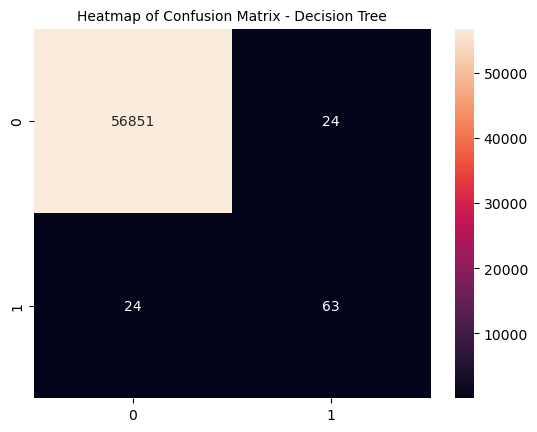

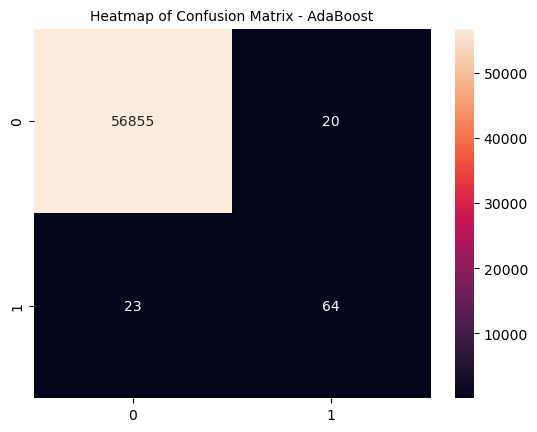

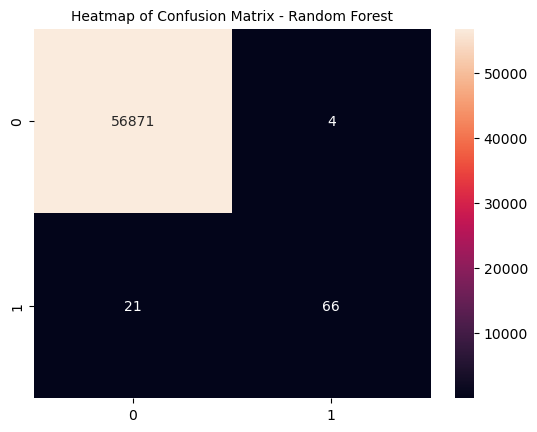

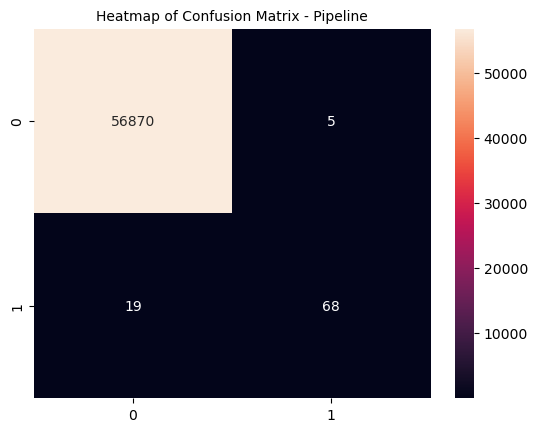

In [722]:
#Logistic Regression 
cm_bestModel_lr = confusion_matrix(Y_test, y_pred_lr_ss)
#Creating a Heatmap of Confusion Matrix
plt.title("Heatmap of Confusion Matrix - Logistic Regression",fontsize=10)
sns.heatmap(cm_bestModel_lr,annot=True, fmt="d", cmap=sns.color_palette("rocket", as_cmap=True))
plt.show()

#Decision Tree Classifier 
cm_bestModel_dt = confusion_matrix(Y_test, y_pred_dt_ss)
#Creating a Heatmap of Confusion Matrix
plt.title("Heatmap of Confusion Matrix - Decision Tree",fontsize=10)
sns.heatmap(cm_bestModel_dt,annot=True, fmt="d", cmap=sns.color_palette("rocket", as_cmap=True))
plt.show()

#AdaBoost Ensemple CLassifier
cm_bestModel_ab = confusion_matrix(Y_test, y_pred_ab_ss)
#Creating a Heatmap of Confusion Matrix
plt.title("Heatmap of Confusion Matrix - AdaBoost",fontsize=10)
sns.heatmap(cm_bestModel_ab,annot=True, fmt="d", cmap=sns.color_palette("rocket", as_cmap=True))
plt.show()

#Random Forest CLassifier
cm_bestModel_rf = confusion_matrix(Y_test, y_pred_rf_ss)
#Creating a Heatmap of Confusion Matrix
plt.title("Heatmap of Confusion Matrix - Random Forest",fontsize=10)
sns.heatmap(cm_bestModel_rf,annot=True, fmt="d", cmap=sns.color_palette("rocket", as_cmap=True))
plt.show()

#Pipeline
cm_bestModel_pipe = confusion_matrix(Y_test, pred_fraud)
#Creating a Heatmap of Confusion Matrix
plt.title("Heatmap of Confusion Matrix - Pipeline",fontsize=10)
sns.heatmap(cm_bestModel_pipe,annot=True, fmt="d", cmap=sns.color_palette("rocket", as_cmap=True))
plt.show()

### Precision 

In [723]:
print(f"Precision Score of the LR  is                    : {precision_score(Y_test,y_pred_lr_ss)*100:.3f}%")
print(f"Precision Score of the DT classifier is          : {precision_score(Y_test,y_pred_dt_ss)*100:.3f}%")
print(f"Precision Score of the AdaBoost classifier is    : {precision_score(Y_test,y_pred_ab_ss)*100:.3f}%")
print(f"Precision Score of the RF classifier is          : {precision_score(Y_test,y_pred_rf_ss)*100:.3f}%")
print('\033[1m' + f"Precision Score of the Pipeline XGBclassifier is : {precision_score(Y_test,pred_fraud)*100:.3f}%")

Precision Score of the LR  is                    : 82.759%
Precision Score of the DT classifier is          : 72.414%
Precision Score of the AdaBoost classifier is    : 76.190%
Precision Score of the RF classifier is          : 94.286%
Precision Score of the Pipeline XGBclassifier is : 93.151%


### Recall

In [724]:
print(f"Recall Score of the LR  is                    : {recall_score(Y_test,y_pred_lr_ss)*100:.3f}%")
print(f"Recall Score of the DT classifier is          : {recall_score(Y_test,y_pred_dt_ss)*100:.3f}%")
print(f"Recall Score of the AdaBoost classifier is    : {recall_score(Y_test,y_pred_ab_ss)*100:.3f}%")
print(f"Recall Score of the RF classifier is          : {recall_score(Y_test,y_pred_rf_ss)*100:.3f}%")
print('\033[1m' + f"Recall Score of the Pipeline XGBclassifier is : {recall_score(Y_test,pred_fraud)*100:.3f}%")

Recall Score of the LR  is                    : 55.172%
Recall Score of the DT classifier is          : 72.414%
Recall Score of the AdaBoost classifier is    : 73.563%
Recall Score of the RF classifier is          : 75.862%
Recall Score of the Pipeline XGBclassifier is : 78.161%


### F1-Score

In [725]:
print(f"Recall Score of the LR  is                    : {f1_score(Y_test,y_pred_lr_ss)*100:.3f}%")
print(f"Recall Score of the DT classifier is          : {f1_score(Y_test,y_pred_dt_ss)*100:.3f}%")
print(f"Recall Score of the AdaBoost classifier is    : {f1_score(Y_test,y_pred_ab_ss)*100:.3f}%")
print(f"Recall Score of the RF classifier is          : {f1_score(Y_test,y_pred_rf_ss)*100:.3f}%")
print('\033[1m' + f"Recall Score of the Pipeline XGBclassifier is : {f1_score(Y_test,pred_fraud)*100:.3f}%")

Recall Score of the LR  is                    : 66.207%
Recall Score of the DT classifier is          : 72.414%
Recall Score of the AdaBoost classifier is    : 74.854%
Recall Score of the RF classifier is          : 84.076%
Recall Score of the Pipeline XGBclassifier is : 85.000%


### ROC-Curve / AUC 

ROC-AUC Score for LR       : 49.556%
ROC-AUC Score for DT       : 87.898%
ROC-AUC Score for AdaBoost : 87.901%
ROC-AUC Score for RF       : 92.180%
ROC-AUC Score for Pipeline : 97.524%


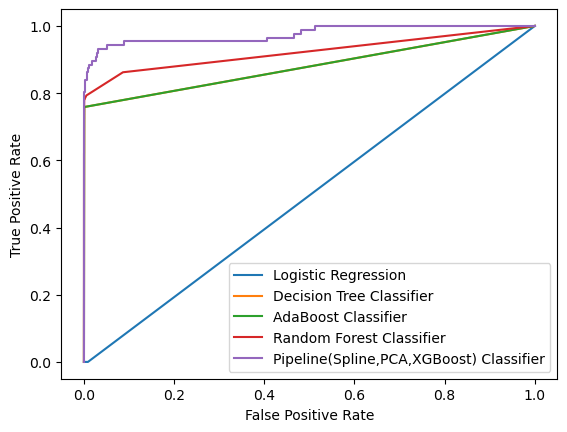

In [726]:
################################################ Logistic Regression ###########################################################
probs_lr = lr_clf_ss.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, threshold = roc_curve(Y_test, probs_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

#plot-Roc_Curve
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

#ROC-AUC_Score
ra_score_lr = roc_auc_score(Y_test, probs_lr)
print(f"ROC-AUC Score for LR       : {ra_score_lr*100:.3f}%")


############################################ Descision Tree Classifier #########################################################
probs_dt = dt_clf_ss.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, threshold = roc_curve(Y_test, probs_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)


#plot-Roc_Curve
plt.plot(fpr_dt, tpr_dt, label="Decision Tree Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')


#ROC-AUC_Score
ra_score_dt = roc_auc_score(Y_test, probs_dt)
print(f"ROC-AUC Score for DT       : {ra_score_dt*100:.3f}%")




################################################ AdaBoost Classifier ###########################################################
probs_ab = ab_clf_ss.predict_proba(X_test)[:, 1]
fpr_ab, tpr_ab, threshold = roc_curve(Y_test, probs_ab)
roc_auc_ab = auc(fpr_ab,tpr_ab)


#plot-Roc_Curve
plt.plot(fpr_ab, tpr_ab, label="AdaBoost Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')


#ROC-AUC_Score
ra_score_ab = roc_auc_score(Y_test, probs_ab)
print(f"ROC-AUC Score for AdaBoost : {ra_score_ab*100:.3f}%")



################################################ Random Forest Classifier ######################################################
probs_rf = rf_clf_ss.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, threshold = roc_curve(Y_test, probs_rf)
roc_auc_rf = auc(fpr_rf,tpr_rf)


#plot-Roc_Curve
plt.plot(fpr_rf, tpr_rf, label="Random Forest Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')


#ROC-AUC_Score
ra_score_rf = roc_auc_score(Y_test, probs_rf)
print(f"ROC-AUC Score for RF       : {ra_score_rf*100:.3f}%")


######################################## Pipeline(Transformer & Estimator) Classifier ##########################################
probs_pipe = pipe.predict_proba(X_test)[:, 1]
fpr_pipe, tpr_pipe, threshold = roc_curve(Y_test, probs_pipe)
roc_auc_pipe = auc(fpr_pipe,tpr_pipe)


#plot-Roc_Curve
plt.plot(fpr_pipe, tpr_pipe, label="Pipeline(Spline,PCA,XGBoost) Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')


#ROC-AUC_Score
ra_score_rf = roc_auc_score(Y_test, probs_pipe)
print('\033[1m' + f"ROC-AUC Score for Pipeline : {ra_score_rf*100:.3f}%")